In [151]:
#Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [152]:
whodata = pd.read_csv('./Life Expectancy Data.csv')
whodata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [153]:
whodata.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [154]:
whodata.shape

(2938, 22)

In [155]:
print(whodata.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [156]:
# Remove leading and trailing spaces from feature names
whodata.columns = whodata.columns.str.strip()

# Display the modified column names
print(whodata.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [157]:
columns_to_fill = ['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 
                   'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population',
                    'Income composition of resources', 'Schooling']

for column in columns_to_fill:
    column_mean = whodata[column].mean()
    whodata[column].fillna(column_mean, inplace=True)

In [158]:
whodata.to_csv('whodata.csv', index=False)

In [159]:
whodata['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [160]:
# Performing One-hot encoding in the 'Status' column 
status_encoded = pd.get_dummies(whodata['Status'], prefix='Status')

# Concatenate the encoded columns to the original DataFrame
whodata_encoded = pd.concat([whodata, status_encoded], axis=1)

# Drop 'Status' column
whodata_encoded = whodata_encoded.drop(['Status'], axis=1)

whodata_encoded.head() 

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [161]:
whodata['Country'].nunique()

193

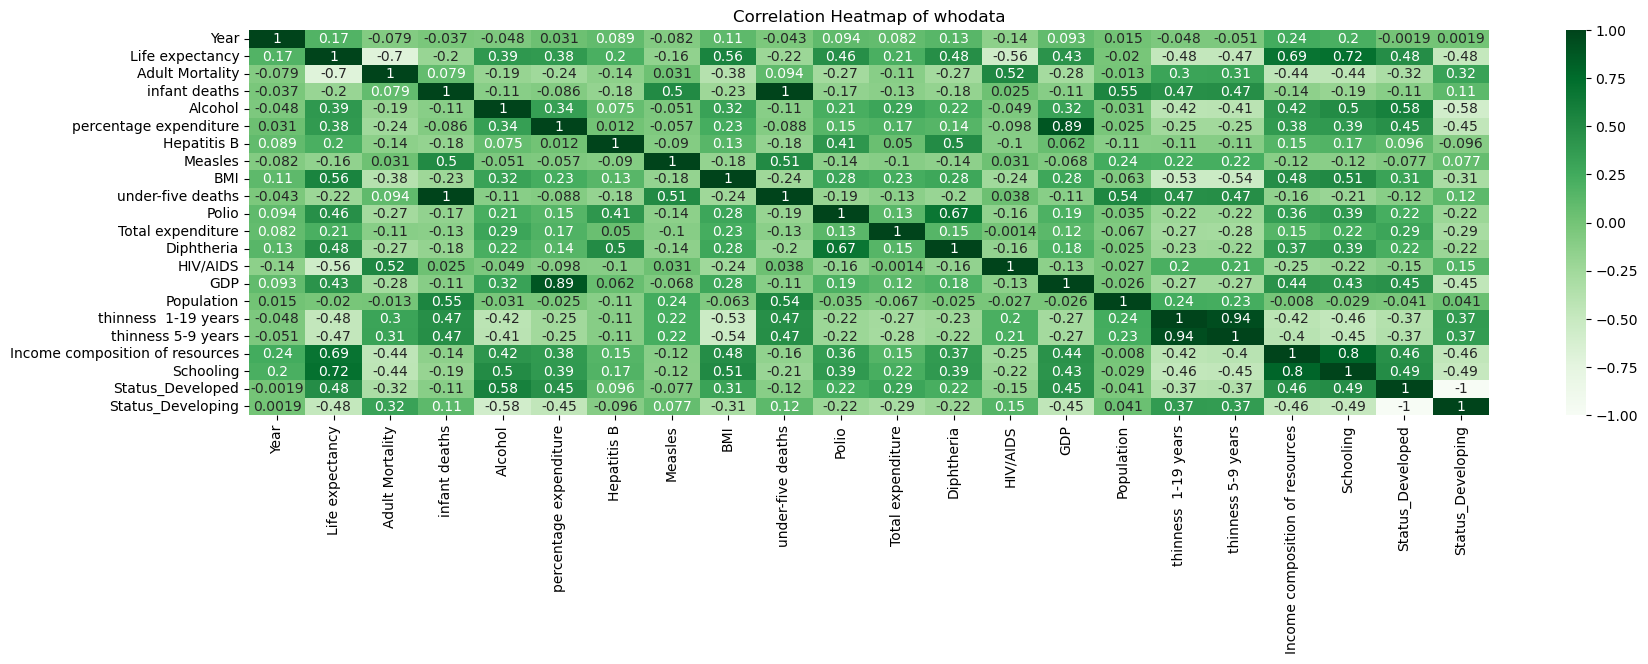

In [162]:
#Visualization of Correlations
fig = plt.figure(figsize=(20,5))
sns.heatmap(whodata_encoded.corr(),annot=True,cmap="Greens")
plt.title('Correlation Heatmap of whodata')
plt.show()

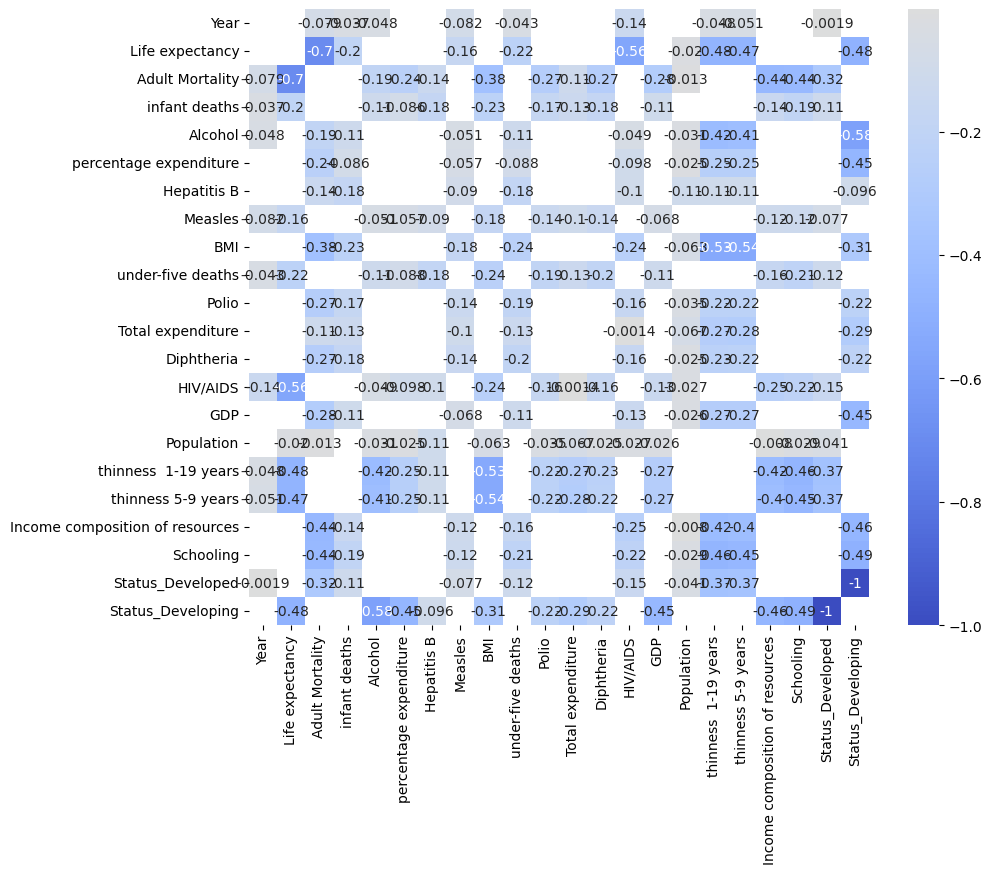

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = whodata_encoded.corr()

# Mask for values below 0.5
mask = corr_matrix < 0

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with only correlations above 0.5
sns.heatmap(corr_matrix[mask], annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.show()

In [164]:
# List of features to drop
features_to_drop = ['Adult Mortality', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years', 'Status_Developing', 'infant deaths', 'Measles', 'under-five deaths', 'Population', 'Country']

# Drop the specified features from the dataset
whodata_encoded= whodata_encoded.drop(features_to_drop, axis=1)

whodata_encoded.head()

,Year,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,GDP,Income composition of resources,Schooling,Status_Developed
0,2015,65.0,0.01,71.279624,65.0,19.1,6.0,8.16,65.0,584.259210,0.479,10.1,0
1,2014,59.9,0.01,73.523582,62.0,18.6,58.0,8.18,62.0,612.696514,0.476,10.0,0
2,2013,59.9,0.01,73.219243,64.0,18.1,62.0,8.13,64.0,631.744976,0.470,9.9,0
3,2012,59.5,0.01,78.184215,67.0,17.6,67.0,8.52,67.0,669.959000,0.463,9.8,0
4,2011,59.2,0.01,7.097109,68.0,17.2,68.0,7.87,68.0,63.537231,0.454,9.5,0


In [166]:
# Define x and y variables
x= whodata_encoded.drop('Life expectancy', axis='columns').to_numpy()
y = whodata_encoded['Life expectancy'].to_numpy()

# Create training and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

# NA

In [167]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(x_train2, y_train)

# Make predictions on the test data
y_pred = lin_model.predict(x_test2)

#Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Linear Regression:')
print('Mean Sqaured Error:', mse)
print('R-Squared:',r2)

Linear Regression:
Mean Sqaured Error: 31.794491990198217
R-Squared: 0.6641793610516864


# NA

In [168]:
from sklearn.linear_model import Ridge, Lasso

# Create Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(x_train2, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(x_test2)

# Calculate evaluation metrics for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)

# Create Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso_model.fit(x_train2, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(x_test2)

# Calculate evaluation metrics for Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)

Ridge Regression:
Mean Squared Error: 31.795910639751668
R-squared: 0.6641643769531944
Lasso Regression:
Mean Squared Error: 35.02782223956473
R-squared: 0.630028193276843


In [169]:
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree Regression model
tree_model = DecisionTreeRegressor(max_depth=5)  
tree_model.fit(x_train2, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(x_test2)

# Calculate evaluation metrics for Decision Tree Regression
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression:")
print("Mean Squared Error:", mse_tree)
print("R-squared:", r2_tree)

Decision Tree Regression:
Mean Squared Error: 19.85023179239478
R-squared: 0.7903373475553812


In [170]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest Regression model
forest_model = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=100)

forest_model.fit(x_train2, y_train)

# Make predictions on the test data
y_pred_forest = forest_model.predict(x_test2)

# Calculate evaluation metrics for Random Forest Regression
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest Regression:")
print("Mean Squared Error:", mse_forest)
print("R-squared:", r2_forest)

Random Forest Regression:
Mean Squared Error: 9.70801831029931
R-squared: 0.8974617077419668


In [171]:
from sklearn.ensemble import GradientBoostingRegressor

# Create Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=100)

gb_model.fit(x_train2, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(x_test2)

# Calculate evaluation metrics for Gradient Boosting Regression
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression:")
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)

Gradient Boosting Regression:
Mean Squared Error: 9.165810735781207
R-squared: 0.9031886271773651


# NA

In [172]:
from sklearn.svm import SVR

# Create SVR model
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)

svr_model.fit(x_train2, y_train)

# Make predictions on the test data
y_pred_svr = svr_model.predict(x_test2)

# Calculate evaluation metrics for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression:")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)

Support Vector Regression:
Mean Squared Error: 35.35321756349108
R-squared: 0.6265912940294693


In [173]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=4)

knn_model.fit(x_train2, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(x_test2)

# Calculate evaluation metrics for KNN Regression
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors Regression:")
print("Mean Squared Error:", mse_knn)
print("R-squared:", r2_knn)

K-Nearest Neighbors Regression:
Mean Squared Error: 13.980084324676243
R-squared: 0.8523391771156017


# NA

In [174]:
from sklearn.linear_model import ElasticNet

# Create Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

elastic_net_model.fit(x_train2, y_train)

# Make predictions on the test data
y_pred_en = elastic_net_model.predict(x_test2)

# Calculate evaluation metrics for Elastic Net Regression
mse_en = mean_squared_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)

print("Elastic Net Regression:")
print("Mean Squared Error:", mse_en)
print("R-squared:", r2_en)

Elastic Net Regression:
Mean Squared Error: 35.80803910100092
R-squared: 0.6217873657458819


In [175]:
from sklearn.preprocessing import PolynomialFeatures

# Transform features into polynomial features
poly = PolynomialFeatures(degree=2) 
x_train_poly = poly.fit_transform(x_train2)
x_test_poly = poly.transform(x_test2)

# Create Polynomial Regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_poly, y_train)

# Make predictions on the test data
y_pred_poly = poly_reg_model.predict(x_test_poly)

# Calculate evaluation metrics for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression:")
print("Mean Squared Error:", mse_poly)
print("R-squared:", r2_poly)

Polynomial Regression:
Mean Squared Error: 19.87822512712961
R-squared: 0.7900416756018919


# NA

In [176]:
from sklearn.linear_model import HuberRegressor

# Create Huber Regression model
huber_reg_model = HuberRegressor(epsilon=1.35)  
huber_reg_model.fit(x_train2, y_train)

# Make predictions on the test data
y_pred_huber = huber_reg_model.predict(x_test2)

# Calculate evaluation metrics for Huber Regression
mse_huber = mean_squared_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)

print("Huber Regression:")
print("Mean Squared Error:", mse_huber)
print("R-squared:", r2_huber)

Huber Regression:
Mean Squared Error: 33.39317927348011
R-squared: 0.6472936632045316


# NA

In [177]:
from sklearn.linear_model import BayesianRidge

# Create Bayesian Ridge Regression model
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(x_train2, y_train)

# Make predictions on the test data
y_pred_bayesian = bayesian_ridge_model.predict(x_test2)

# Calculate evaluation metrics for Bayesian Ridge Regression
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

print("Bayesian Ridge Regression:")
print("Mean Squared Error:", mse_bayesian)
print("R-squared:", r2_bayesian)

Bayesian Ridge Regression:
Mean Squared Error: 31.82360663430592
R-squared: 0.6638718455741623


# Best Algorithms to predict 'life expectancy' are:

| Regression Algorithm         | Mean Squared Error    | R-squared           |
|-----------------------------|-----------------------|---------------------|
| K-Nearest Neighbors         | 13.980084324676243   | 0.8523391771156017 |
| Gradient Boosting           | 9.165810735781207    | 0.9031886271773651 |
| Random Forest               | 9.70801831029931     | 0.8974617077419668 |